# Building Energy Efficiency Prediction: Modeling Heating and Cooling Loads  
### Third Notebook: Objective

Following the modeling and analysis conducted in the first two notebooks, this third section focuses on **deriving actionable insights** from the predictive results. The goal is to translate the findings from linear, regularized, tree-based, and neural network models into **practical recommendations for responsible environmental and municipal asset management**. 

Rather than introducing new models or preprocessing steps, this notebook synthesizes the evidence collected to highlight **which architectural features most strongly influence heating and cooling loads**, how they interact, and what strategies could be prioritized to improve energy efficiency. Emphasis is placed on **interpreting model outputs in a way that is meaningful for decision-makers**, while acknowledging the limitations of simulation-based data.

Before implementing any recommendation, a **diagnostic of building spaces** should be conducted to **assess current energy consumption, structural characteristics, costs, and intervention needs**. The insights presented here indicate where **targeted strategies** could have the greatest impact.

**Author:** J-F Jutras  
**Date:** November 2025  
**Dataset:** *Energy Efficiency Dataset – UCI Machine Learning Repository*  
**Citation:** Tsanas, A., & Xifara, A. (2012). *Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools.* *Energy and Buildings, 49*, 560–567. [DOI: 10.1016/j.enbuild.2012.03.003](https://doi.org/10.1016/j.enbuild.2012.03.003)


## 3.1-Data Loading

In [28]:
import pandas as pd

#Load the Excel file
df = pd.read_excel("/kaggle/input/energy-efficiency-dataset/ENB2012_data.xlsx")

## 3.2-Prioritize Compact Building Designs and Retrofits

**Finding:** Buildings with higher relative compactness (X1) reduce heating and cooling loads.  

**Actionable Recommendation:** Conduct a diagnostic of existing municipal buildings to identify sprawling structures and evaluate retrofit options or space reorganization.  

**Note:** Compactness (X1) consistently shows a strong negative effect on both heating (Y1) and cooling (Y2) loads in the models.


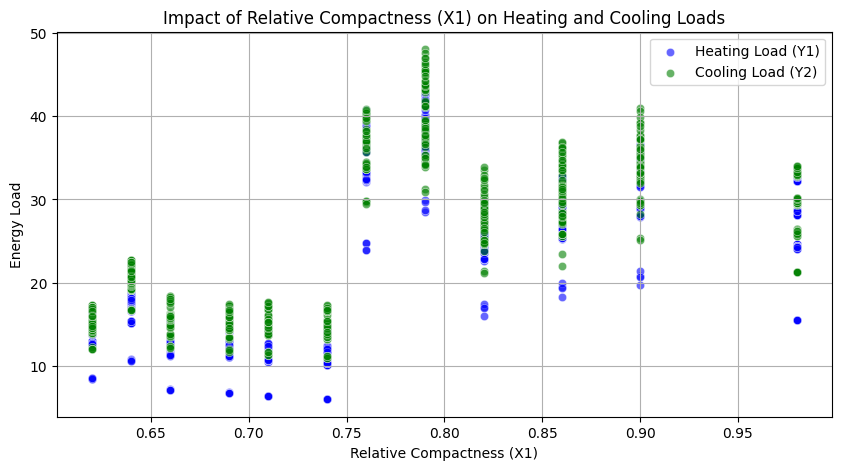

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(x='X1', y='Y1', data=df, color='blue', alpha=0.6, label='Heating Load (Y1)')
sns.scatterplot(x='X1', y='Y2', data=df, color='green', alpha=0.6, label='Cooling Load (Y2)')
plt.xlabel('Relative Compactness (X1)')
plt.ylabel('Energy Load')
plt.title('Impact of Relative Compactness (X1) on Heating and Cooling Loads')
plt.legend()
plt.grid(True)
plt.show()

This scatter plot shows the relationship between X1 (Relative Compactness) and the two energy load targets.

Higher X1 values (more compact buildings) correspond to lower heating and cooling loads, indicating energy efficiency benefits.

Decision-makers can use this visualization to identify less compact buildings as priority candidates for space optimization or retrofitting measures.

## 3.3-Control and Manage Building Heights

**Finding:** Taller buildings (higher X5) generally have higher energy loads.

**Actionable Recommendation:** Evaluate energy audits for tall municipal buildings, consider insulation improvements or HVAC optimization, and integrate height considerations in planning new constructions.  

**Note:** Height (X5) shows a strong positive correlation with both heating (Y1) and cooling (Y2) loads in the models.

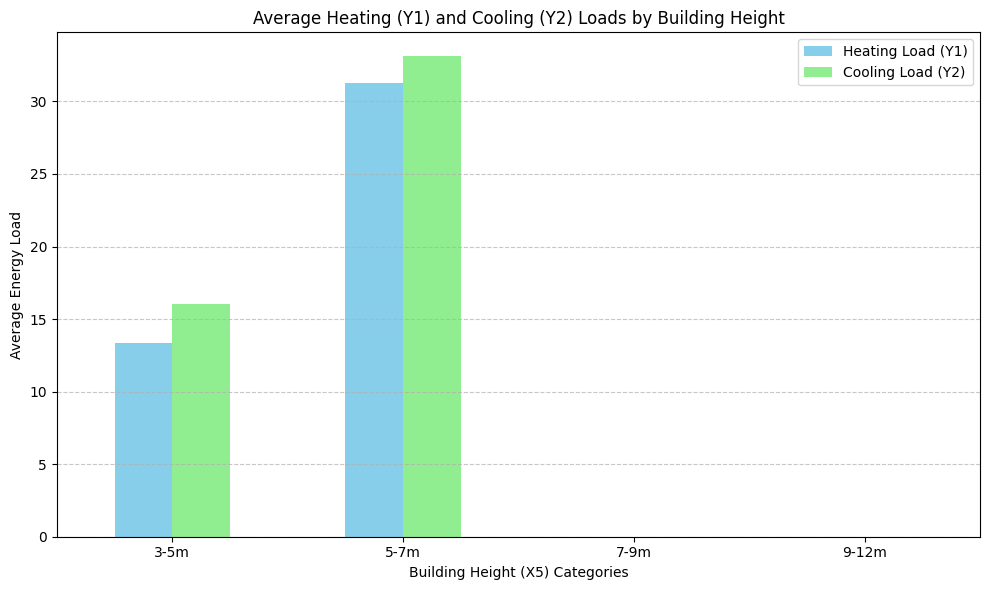

In [30]:
import pandas as pd

#Create height bins
df['Height_Bin'] = pd.cut(df['X5'], bins=[3, 5, 7, 9, 12], labels=['3-5m','5-7m','7-9m','9-12m'])

#Compute mean energy loads per bin (explicit observed = False to avoid FutureWarning)
mean_loads = df.groupby('Height_Bin', observed = False)[['Y1','Y2']].mean()

# Plot
mean_loads.plot(kind = 'bar', figsize = (10,6), color = ['skyblue','lightgreen'])
plt.xlabel('Building Height (X5) Categories')
plt.ylabel('Average Energy Load')
plt.title('Average Heating (Y1) and Cooling (Y2) Loads by Building Height')
plt.xticks(rotation=0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.legend(['Heating Load (Y1)','Cooling Load (Y2)'])
plt.tight_layout()
plt.show()

The bar plot displays the **average heating (Y1) and cooling (Y2) loads** per building height category. Taller buildings show **higher average energy loads**, making the trend immediately visible. This visualization helps decision-makers **prioritize taller buildings** for audits, retrofits, or energy efficiency interventions.

## 3.4-Optimize roof and surface areas

**Finding:** Larger building surface areas and roof areas are generally associated with lower heating and cooling loads.  

**Actionable Recommendation:** Prioritize design and retrofits that optimize roof and surface areas. For existing municipal buildings, evaluate potential expansions, roofing modifications, or insulation upgrades to reduce energy consumption.


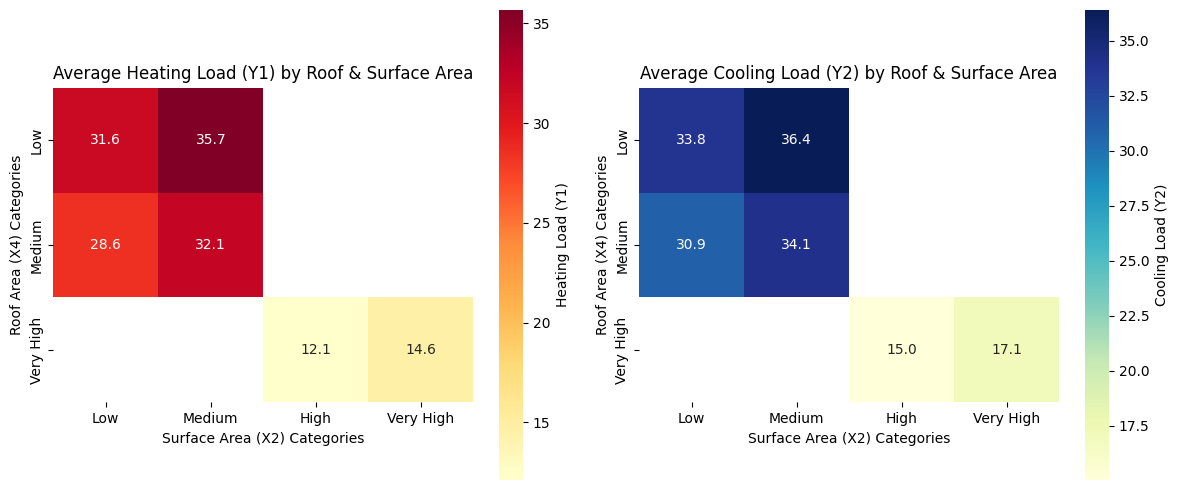

In [45]:
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning, module="matplotlib.colors")

#Bin the data into 4 categories using linear spacing
df['Surface_Bin'] = pd.cut(df['X2'], bins=np.linspace(df['X2'].min(), df['X2'].max(), 5),
                            labels=['Low','Medium','High','Very High'])
df['Roof_Bin'] = pd.cut(df['X4'], bins=np.linspace(df['X4'].min(), df['X4'].max(), 5),
                        labels=['Low','Medium','High','Very High'])

#Pivot tables calculating mean of Y1 and Y2 for each bin combination
pivot_y1 = df.pivot_table(index='Roof_Bin', columns='Surface_Bin', values='Y1', aggfunc='mean', observed=False)
pivot_y2 = df.pivot_table(index='Roof_Bin', columns='Surface_Bin', values='Y2', aggfunc='mean', observed=False)

#Heatmap plotting
plt.figure(figsize=(12,5))

#Heating Load heatmap
plt.subplot(1,2,1)
sns.heatmap(pivot_y1, annot=True, fmt=".1f", cmap="YlOrRd", square=True, cbar_kws={'label':'Heating Load (Y1)'})
plt.title('Average Heating Load (Y1) by Roof & Surface Area')
plt.xlabel('Surface Area (X2) Categories')
plt.ylabel('Roof Area (X4) Categories')

#Cooling Load heatmap
plt.subplot(1,2,2)
sns.heatmap(pivot_y2, annot=True, fmt=".1f", cmap="YlGnBu", square=True, cbar_kws={'label':'Cooling Load (Y2)'})
plt.title('Average Cooling Load (Y2) by Roof & Surface Area')
plt.xlabel('Surface Area (X2) Categories')
plt.ylabel('Roof Area (X4) Categories')

plt.tight_layout()
plt.show()

The heatmaps display the average heating (Y1) and cooling (Y2) loads for each combination of roof area (X4) and surface area (X2) categories. 

The highest energy loads occur in buildings with **small or medium surface areas (X2) combined with medium or low roof areas (X4)**.

This visualization helps decision-makers identify the building configurations that are most energy-intensive, guiding targeted interventions such as insulation improvements, roof upgrades, or energy retrofits.

## 3.5-Optimize Glazing and Building Compactness for Energy Efficiency

**Finding:** Buildings with larger glazing areas (X7) tend to have higher cooling loads (Y2), while more compact buildings (higher X1) generally have lower heating and cooling loads.  

**Actionable Recommendation:** Municipalities should prioritize **window retrofits, shading solutions, or design adjustments** for buildings with large glazing areas and low compactness to reduce energy consumption and operational costs.

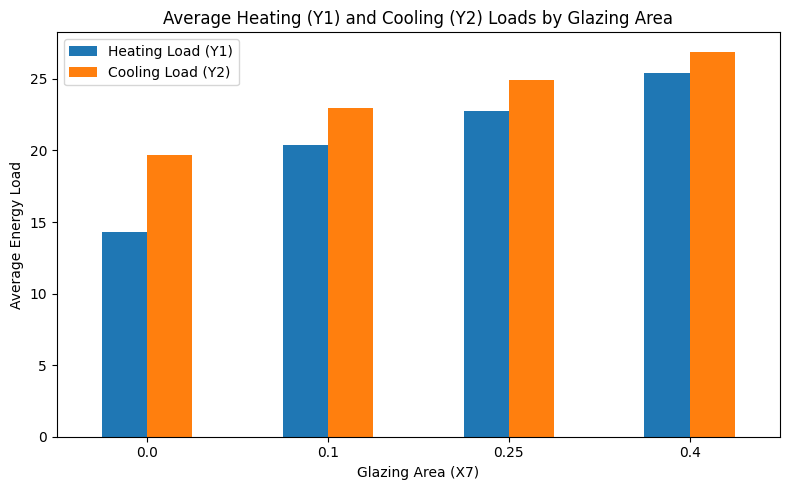

In [25]:
#Bar plot
mean_loads = df.groupby('X7')[['Y1','Y2']].mean()

mean_loads.plot(kind='bar', figsize=(8,5))
plt.xlabel('Glazing Area (X7)')
plt.ylabel('Average Energy Load')
plt.title('Average Heating (Y1) and Cooling (Y2) Loads by Glazing Area')
plt.xticks(rotation=0)
plt.legend(['Heating Load (Y1)', 'Cooling Load (Y2)'])
plt.tight_layout()
plt.show()

The bar plot shows the average heating (Y1) and cooling (Y2) loads for each glazing area category (X7).  

- Larger glazing areas correspond to higher cooling loads.  
- Heating loads remain relatively stable across categories.  

This simple visualization makes it easy for decision-makers to **spot buildings with large windows for potential energy efficiency interventions**.


## 3.6- Next Steps for Municipal Asset Management

After conducting a thorough diagnostic of municipal buildings to assess energy consumption, structural characteristics, and key architectural features, decision-makers should follow these steps:

**Conduct a comprehensive diagnostic** of all municipal buildings, evaluating current energy consumption, structural characteristics, and key architectural features.  

**Identify high-priority buildings** by focusing on structures that present combinations of high-risk factors:  
   - Low relative compactness (X1)  
   - Taller building heights (X5)  
   - Small or medium surface areas (X2) with medium or low roof areas (X4)  
   - Large glazing areas (X7)  

**Perform detailed financial and feasibility assessments** for these prioritized buildings, including:  
   - Cost analysis of potential retrofits  
   - Expected energy savings and return on investment  
   - Operational and maintenance implications  

**Develop an evidence-based intervention plan** that aligns with municipal energy efficiency goals, scheduling retrofits or design adjustments in a way that maximizes impact while remaining financially responsible.  

**Monitor and evaluate outcomes** post-implementation to ensure that projected energy savings are realized, and update asset management strategies accordingly.

**Limitations:** Insights are derived from simulation-based data and may not fully represent real municipal buildings. Recommendations should be validated with on-site audits and local context before implementation.

